# Linear Regression

Linear Regression is one of the most basic machine learning algorithms and is used to find linear relations between one or more inputs and the output.

See [here](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#linear-regression) for some useful stuffs, though not as useful as paying attention to what you have learnt.

First, we import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.datasets import load_boston, load_linnerud
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data
The file containing data is `weatherHistory.csv`. Open it using pandas, with the headers in the first rows, and put the resulting DataFrame into variable `weather_data`.

In [2]:
# Insert your code here:
weather_data = pd.read_csv('/content/drive/MyDrive/FUNIX Progress/MLP302x_1.1-A_EN/data/weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Simple data visualization
Generally, after we load in any types of data, we would want to _visualize_ them into graphs and charts which are more intuitive. For example, the `pandas` library provide an inbuilt 2d plot function for its `DataFrame` objects. Quite useful if we want to concentrate only on two or three properties.

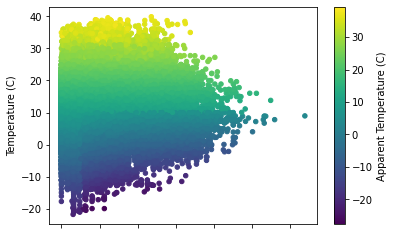

In [3]:
x_field = "Wind Speed (km/h)"
y_field = "Temperature (C)"
c_field = "Apparent Temperature (C)"
weather_data.plot.scatter(x = x_field, y = y_field, c = c_field, colormap='viridis')

It is also shipped with inbuilt correlation function, although if you want nifty pretty images, you have to work for it since it only provide you with the 2D matrix. Call the function `DataFrame.corr` to retrieve the correlation matrix from the DataFrame object, and create an `matplotlib.axes.Axes` that can be seen from `matplotlib`. You can create a tuple of (Figure, Axes) from `matplotlib.pyplot.subplots`.
Then, visuzalize the correlation matrix using matplotlib.

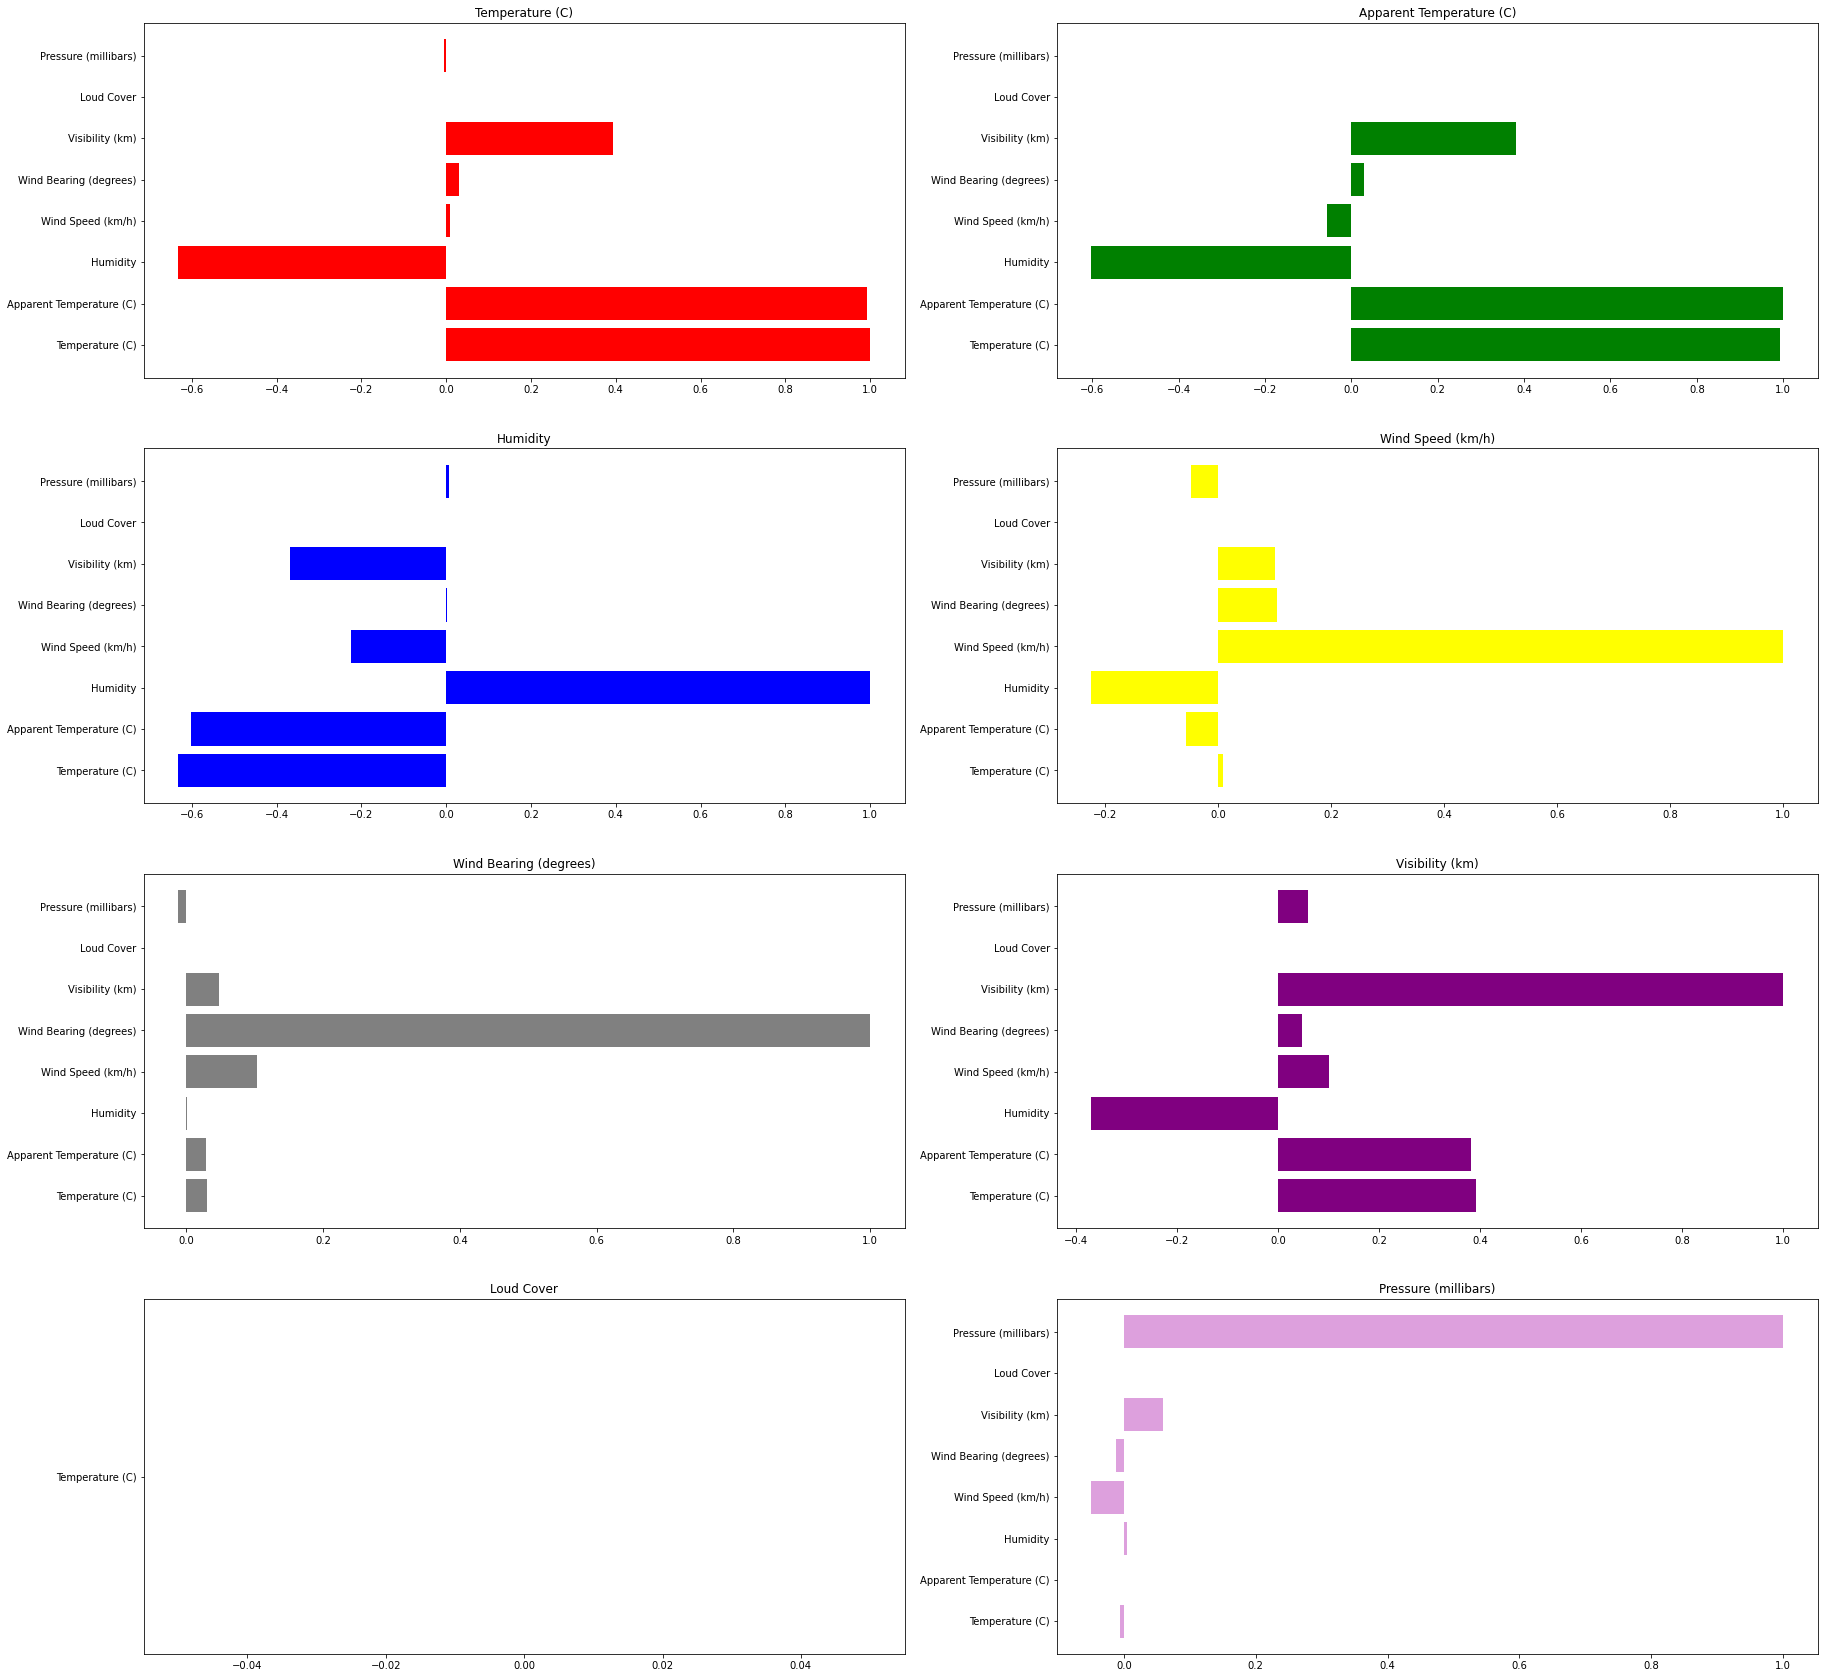

In [4]:
# Insert your code here:
corr = weather_data.corr()
fig, ax = plt.subplots(4, 2)
fig.set_figheight(30)
fig.set_figwidth(30)

colors = ['red', 'green', 'blue', 'yellow', 'grey', 'purple', 'violet', 'plum']
temp = 0

for i in range(4):
  for j in range(2):
    ax[i, j].barh(corr.index, corr[corr.index[i + temp + j]], color=colors[i + temp +j])
    ax[i, j].title.set_text(corr.columns[i + temp + j])
  temp += 1

plt.show()


# corr matrix

## Extra considerations
* For a good linear regression model, we select features with high positive or negative correlation. High absolute correlation often means that the paired variables \*moves\* similarly to each other.
* When selecting features, avoid having multi-co-linearity within features since they may introduce noises. Search [here](https://stats.stackexchange.com/a/1150) for more.

## Helper functions
All functions we required for this assignment have already been provided by `sklearn` library; However, they are not strictly a requirement - students can implement their own versions as they see fit.

In [5]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
weather_data["bias"] = 1
train_data, test_data = train_test_split(weather_data, train_size=0.8, test_size=0.2, random_state=0)

## LinearRegression
### Extracting data
Your first task is to write a function extracting features from both training and test data. The format is provided below. Make sure to view the two function call in the cell below to easier understand what is wanted.

The "bias" field is mostly for helping those who build their custom model, as `sklearn`'s implementation already have bias by default.

In [7]:
def extract_features_and_labels(data, features_name, labels_name):
    # Insert your codes here
    features_data = data[features_name].values
    labels_data = data[labels_name].values
    return features_data, labels_data

In [8]:
# Run this after the function had been written
train_features, train_labels = extract_features_and_labels(train_data, ["Temperature (C)", "bias"], "Apparent Temperature (C)")
test_features, test_labels = extract_features_and_labels(test_data, ["Temperature (C)", "bias"], "Apparent Temperature (C)")

### Create and train model instances
Now, create two models that fit to the training data (features and labels). Again, you can either make them yourself, or consult the imported functions/classes. The first model will use matrix solving least-squared and called `linear_model`; the second will use gradient descent and called `sgd_model`. Both can only train on the **(train_features, train_labels)** set only.

Remember, both must conform to the model interface from sklearn, which means, at minimum, the functions <i>fit</i> for training and <i>predict</i> for inference.

In [9]:
# Insert your code here:
model_1 = LinearRegression().fit(train_features, train_labels)
model_2 = SGDRegressor().fit(train_features, train_labels)

### Visualize the result
After the model had been constructed and trained, we can apply them on the test set **(test_features, test_labels)** and calculate the MSE score to evaluate their performance. However, it will not be as intuitive as plotting our models on a 2D space as we will do below.

MSE for linear model: 1.68
MSE for gradient descent model: 1.71


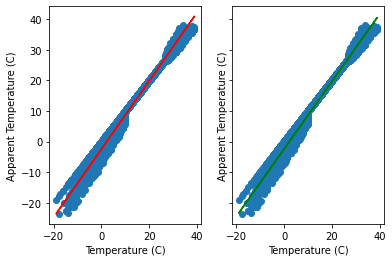

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# scatter on both
datapoint_x = test_features[:, 0]
datapoint_y = test_labels
ax1.scatter(datapoint_x, datapoint_y)
ax2.scatter(datapoint_x, datapoint_y)

# draw the linear version on 1 and sgd on 2
# Insert your code here:
linear_y = model_1.predict(test_features)
ax1.plot(datapoint_x, linear_y, 'r')

sgd_y = model_2.predict(test_features)
ax2.plot(datapoint_x, sgd_y, 'g')

ax1.set_xlabel("Temperature (C)")
ax2.set_xlabel("Temperature (C)")
ax1.set_ylabel("Apparent Temperature (C)")
ax2.set_ylabel("Apparent Temperature (C)")

error_linear = mean_squared_error(test_labels, linear_y)
error_sgd = mean_squared_error(test_labels, sgd_y)
print("MSE for linear model: {:.2f}\nMSE for gradient descent model: {:.2f}".format(error_linear, error_sgd))

### Multiple Regression models
As you can see, the previous example is a no-brainer - "Apparent Temperature" are closely linked to "Temperature", and one alone can easily make a good guess on the other. The harder problem is if we can predict other aspect, such as "Visibility". 

Choose two features you think will work best and train the two models just as above. Save them into variables `linear_model_multiple` and `sgd_model_multiple`. Think:
* What will be good two features to put into this new model?
* How well do those features correlate with the label? With each other?
* Is there a risk of collinearity between your features?

In [11]:
train_data.head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,bias
66953,2013-03-27 17:00:00.000 +0100,Overcast,rain,0.022222,-3.488889,0.92,10.8514,171.0,4.8783,0.0,1012.9,Foggy starting overnight continuing until morn...,1


In [12]:
train_features, train_labels = extract_features_and_labels(train_data, ["Temperature (C)", "Humidity", "bias"], "Visibility (km)")
test_features, test_labels = extract_features_and_labels(test_data, ["Temperature (C)", "Humidity", "bias"], "Visibility (km)")

In [13]:
# Insert your code here:
linear_model_multiple = LinearRegression().fit(train_features, train_labels)
sgd_model_multiple = SGDRegressor().fit(train_features, train_labels)

### 3D visualization
Since we now have two features instead of one, plotting the result of the regression on 2D would be quite clunky. Good thing that the `matplotlib` library also provide us with a 3D plotting function. The block of code below will draw it for you, provide that you have put your models in the right places (`linear_model_multiple` and `sgd_model_multiple`) and them having correct interface (`fit` and `predict`).

MSE for linear multiple model: 14.47
MSE for gradient descent multiple model: 14.98


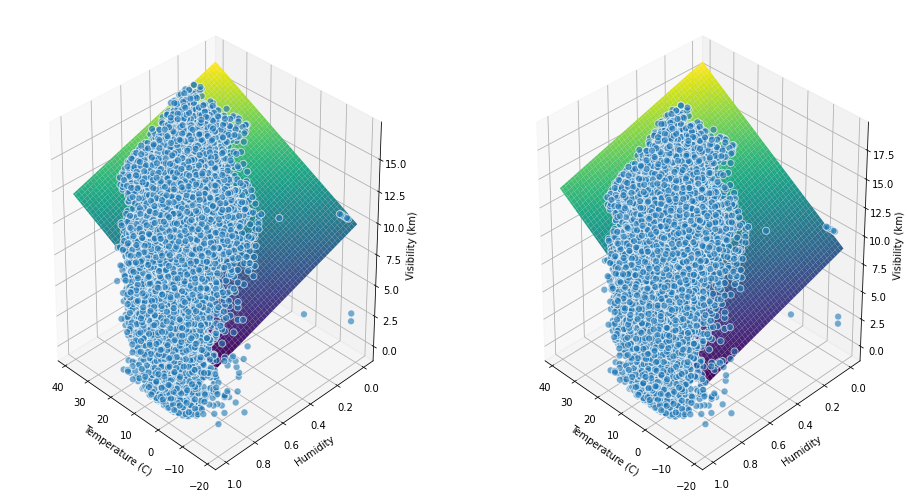

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

#to Add a color bar which maps values to colors.
feature_1 = test_features[:, 0]
feature_2 = test_features[:, 1]
ax1.scatter(feature_1, feature_2, test_labels, s=50, alpha=0.6, edgecolors='w')
ax2.scatter(feature_1, feature_2, test_labels, s=50, alpha=0.6, edgecolors='w')

x_dimension = np.linspace(np.amin(feature_1), np.amax(feature_1), 100)
y_dimension = np.linspace(np.amin(feature_2), np.amax(feature_2), 100)
mesh_x, mesh_y = np.meshgrid(x_dimension, y_dimension)

mesh_features = np.stack([mesh_x, mesh_y, np.ones_like(mesh_x)], axis=-1)
mesh_features = np.reshape(mesh_features, [-1, 3])

linear_z = linear_model_multiple.predict(mesh_features)
linear_z = np.reshape(linear_z, np.shape(mesh_x))

ax1.plot_surface(mesh_x, mesh_y, linear_z, cmap=cm.viridis, linewidth=0.2)


sgd_z = sgd_model_multiple.predict(mesh_features)
sgd_z = np.reshape(sgd_z, np.shape(mesh_x))

ax2.plot_surface(mesh_x, mesh_y, sgd_z, cmap=cm.viridis, linewidth=0.2)

error_linear = mean_squared_error(test_labels, linear_model_multiple.predict(test_features))
error_sgd = mean_squared_error(test_labels, sgd_model_multiple.predict(test_features))
print("MSE for linear multiple model: {:.2f}\nMSE for gradient descent multiple model: {:.2f}".format(error_linear, error_sgd))
for ax in [ax1, ax2]:
    ax.set_xlabel("Temperature (C)")
    ax.set_ylabel("Humidity")
    ax.set_zlabel("Visibility (km)")
    ax.view_init(azim=135)

plt.axis('tight')
plt.show()

# Self Implementation

## Importation

### Import Library

In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

### Import Dataset

In [16]:
df = pd.read_csv('/content/drive/MyDrive/FUNIX Progress/MLP302x_1.1-A_EN/data/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Visualize Correlation

#### Correlation between temperature and humidity

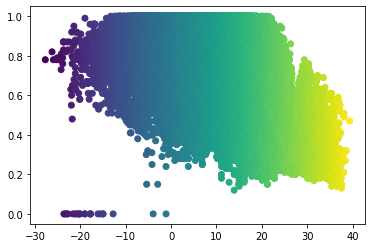

In [17]:
# Correlation between temperature and humidity
plt.scatter(df['Apparent Temperature (C)'], df['Humidity'], c = df['Apparent Temperature (C)'])

#### Correlation Table

In [18]:
corr = df.corr().fillna(0)
corr.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,0.0,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,0.0,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.0,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,0.0,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,0.0,-0.011651


#### Visualize Correlation Score

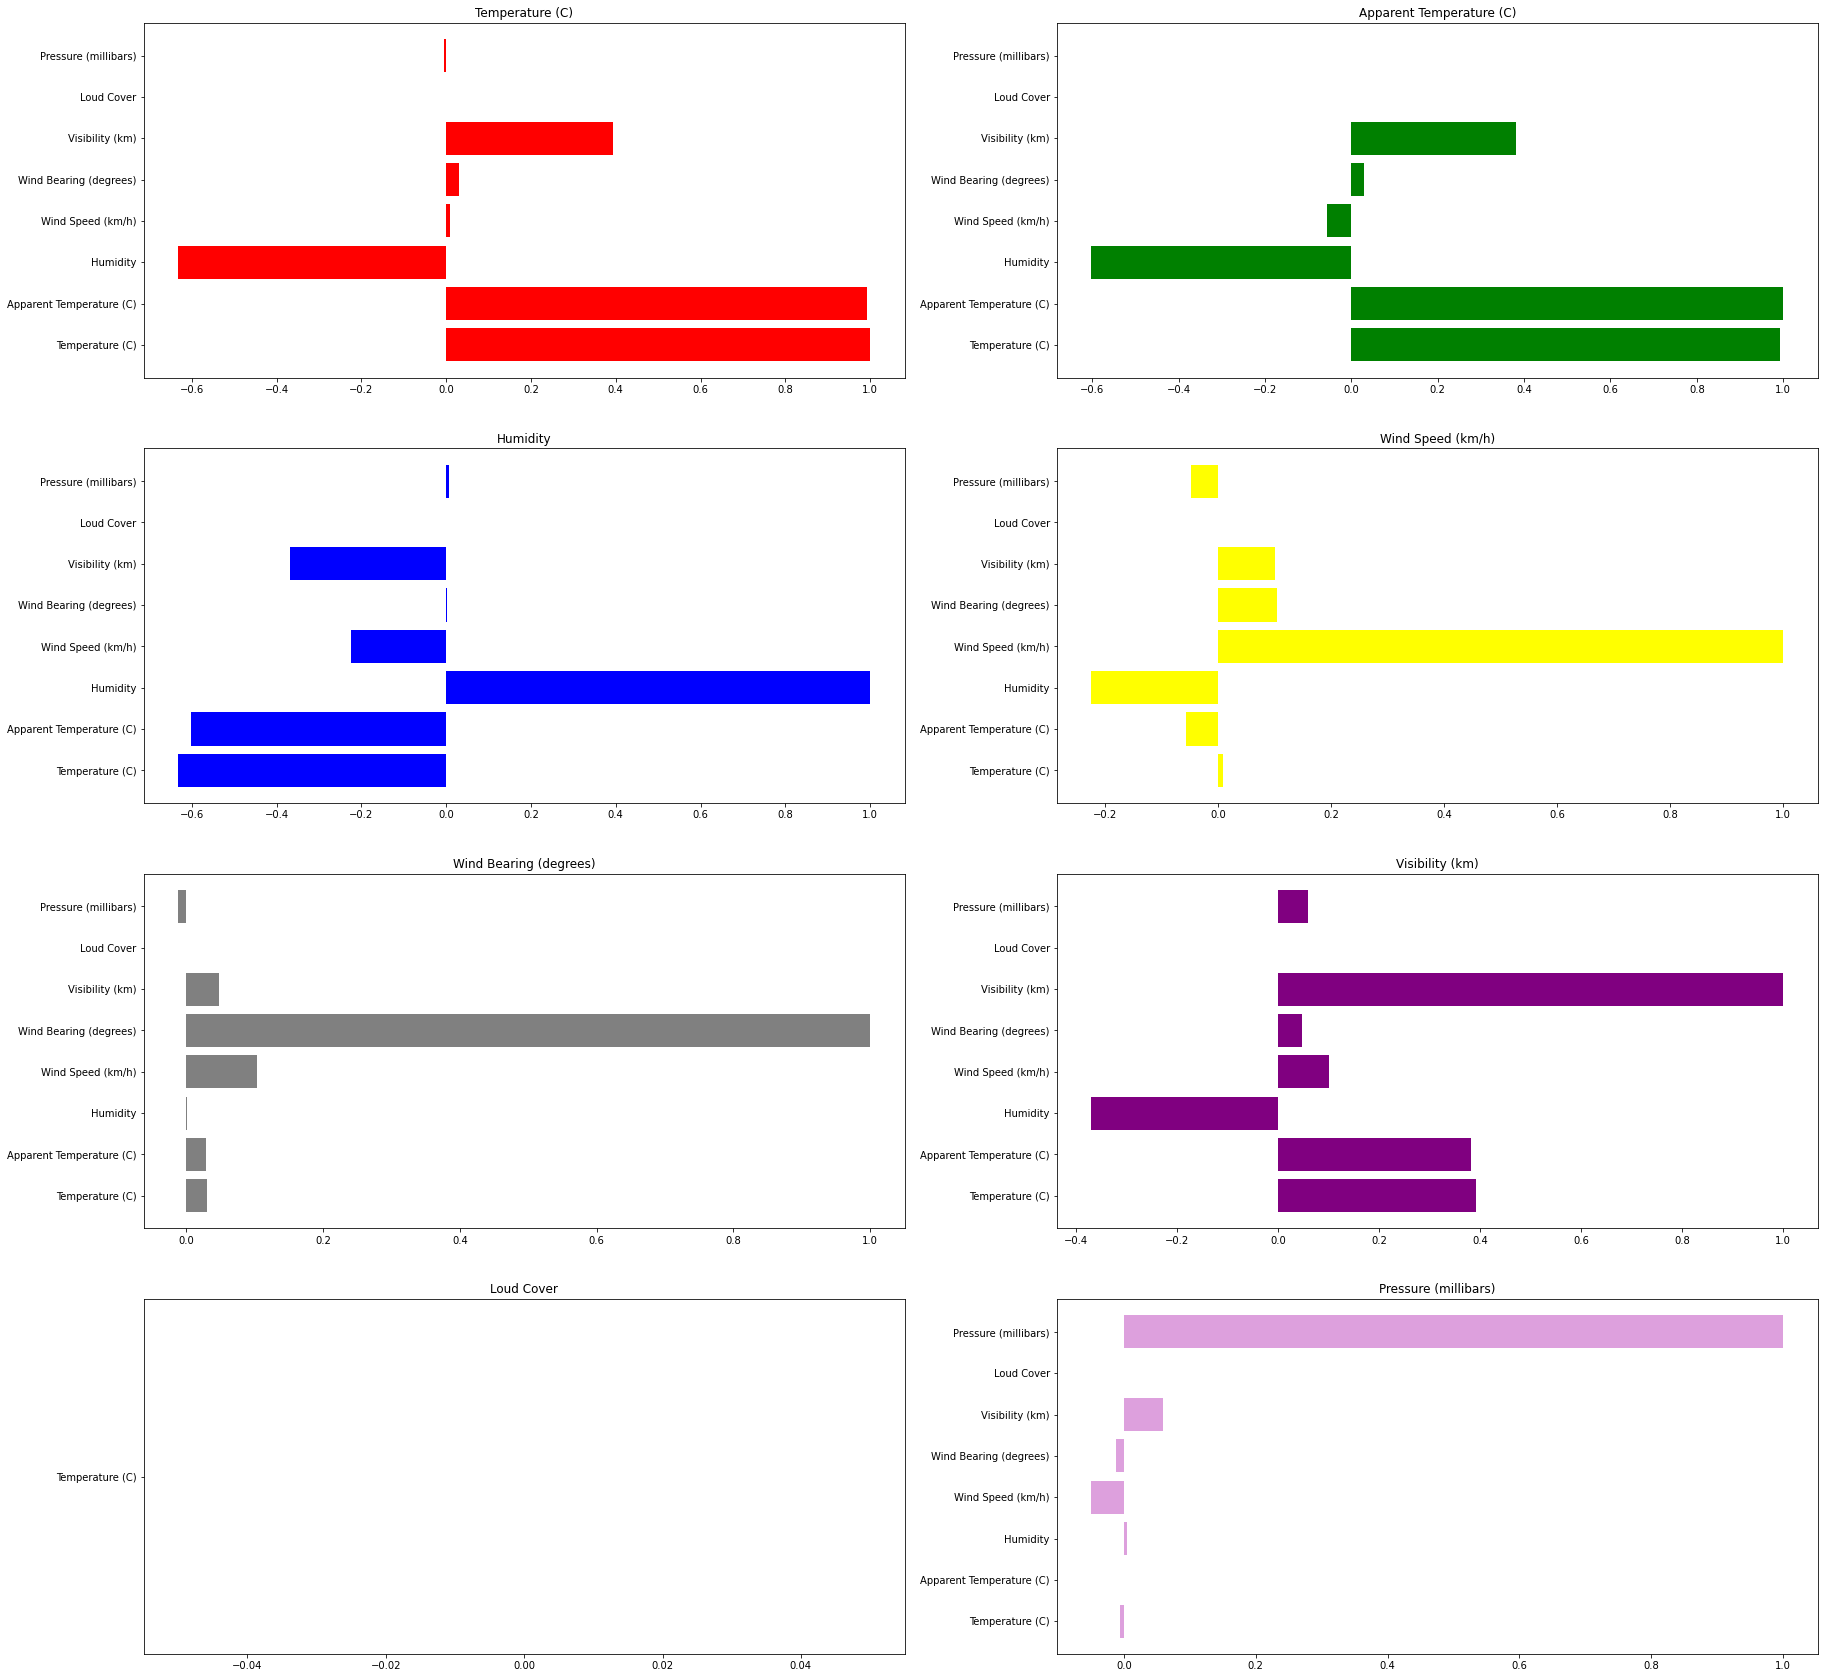

In [19]:
# Insert your code here:
corr = df.corr()
fig, ax = plt.subplots(4, 2)
fig.set_figheight(30)
fig.set_figwidth(30)

colors = ['red', 'green', 'blue', 'yellow', 'grey', 'purple', 'violet', 'plum']
temp = 0

for i in range(4):
  for j in range(2):
    ax[i, j].barh(corr.index, corr[corr.index[i + temp + j]], color=colors[i + temp +j])
    ax[i, j].title.set_text(corr.columns[i + temp + j])
  temp += 1

plt.show()

### Train Test Split

In [20]:
train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0)

## Simple Linear Regression

### Close Form Approach

#### Function Implementation

In [21]:
from scipy import stats

def correlation_approach(input, output):
  pearson_r = stats.pearsonr(input, output)[0]

  std_X = np.std(input)
  std_Y = np.std(output)

  mean_X = input.mean()
  mean_Y = output.mean()

  slope = pearson_r * (std_Y / std_X)
  intercept = mean_Y - slope * mean_X

  return intercept, slope

In [22]:
def sum_approach(input, output):
  N = len(input)

  sum_XY = np.dot(input, output)

  sum_X = sum(input)
  sum_Y = sum(output)

  sum_square_X = np.dot(input, input)

  mean_X = input.mean()
  mean_Y = output.mean()

  slope = (sum_XY - 1/N * sum_X * sum_Y) / (sum_square_X - 1/N * sum_X * sum_X)
  intercept = mean_Y - slope * mean_X

  return intercept, slope

In [23]:
def mean_approach(input, output):
  N = len(input)

  mean_XY = (input * output).mean()

  mean_X = input.mean()
  mean_Y = output.mean()

  mean_square_X = (input * input).mean()

  mean_X = input.mean()
  mean_Y = output.mean()

  slope = (mean_XY - mean_X * mean_Y) / (mean_square_X - mean_X * mean_X)
  intercept = mean_Y - slope * mean_X

  return intercept, slope

In [24]:
def predict(intercept, slope, feature):
  return intercept + slope * feature

#### Testing Section

##### Training Coefficient

In [25]:
from sklearn.linear_model import LinearRegression

feature = train["Temperature (C)"].values
label = train["Apparent Temperature (C)"].values

linear_model = LinearRegression().fit(np.reshape(feature, [-1, 1]), label)

print("- Built in Function:", (linear_model.intercept_, linear_model.coef_[0]))
print("- Correlation Approach:", correlation_approach(feature, label))
print("- Sum Approach:", sum_approach(feature, label))
print("- Mean Approach:", mean_approach(feature, label))

- Built in Function: (-2.4161751423042777, 1.1119702535787954)
- Correlation Approach: (-2.416175142304281, 1.1119702535787956)
- Sum Approach: (-2.4161751423043185, 1.1119702535787988)
- Mean Approach: (-2.4161751423042723, 1.111970253578795)


---

##### Prediction first value of test data

In [26]:
feature = train["Temperature (C)"].values
label = train["Apparent Temperature (C)"].values
predict_value = test["Temperature (C)"].values[0]

prediction_1 = linear_model.predict(np.reshape(predict_value, [-1, 1]))
print("- Built in Function:", prediction_1)

intercept, slope = correlation_approach(feature, label)
prediction_2 = predict(intercept, slope, predict_value)
print("- Correlation Approach:", prediction_2)

intercept, slope = sum_approach(feature, label)
prediction_3 = predict(intercept, slope, predict_value)
print("- Sum Approach:", prediction_3)

intercept, slope = mean_approach(feature, label)
prediction_4 = predict(intercept, slope, predict_value)
print("- Mean Approach:", prediction_4)

- Built in Function: [13.62090696]
- Correlation Approach: 13.620906959309908
- Sum Approach: 13.620906959309917
- Mean Approach: 13.62090695930991


##### Generate Prediction

In [27]:
# Feature and Label for training purpose
feature = train["Temperature (C)"].values
label = train["Apparent Temperature (C)"].values

# Feature and Label for testing purpose
predict_value = test["Temperature (C)"].values
predict_label = test["Apparent Temperature (C)"].values

# Built in function
prediction_1 = linear_model.predict(np.reshape(predict_value, [-1, 1]))

# Correlation Approach
intercept, slope = correlation_approach(feature, label)
prediction_2 = predict(intercept, slope, predict_value)

# Sum Approach
intercept, slope = sum_approach(feature, label)
prediction_3 = predict(intercept, slope, predict_value)

# Mean Approach
intercept, slope = mean_approach(feature, label)
prediction_4 = predict(intercept, slope, predict_value)

##### Compute Loss

In [28]:
print("- Built in Function:", sklearn.metrics.mean_squared_error(predict_label, prediction_1))
print("- Correlation Approach:", sklearn.metrics.mean_squared_error(predict_label, prediction_2))
print("- Sum Approach:", sklearn.metrics.mean_squared_error(predict_label, prediction_3))
print("- Mean Approach:", sklearn.metrics.mean_squared_error(predict_label, prediction_4))

- Built in Function: 1.6820729326083672
- Correlation Approach: 1.6820729326083668
- Sum Approach: 1.6820729326083679
- Mean Approach: 1.6820729326083668


##### Visualization

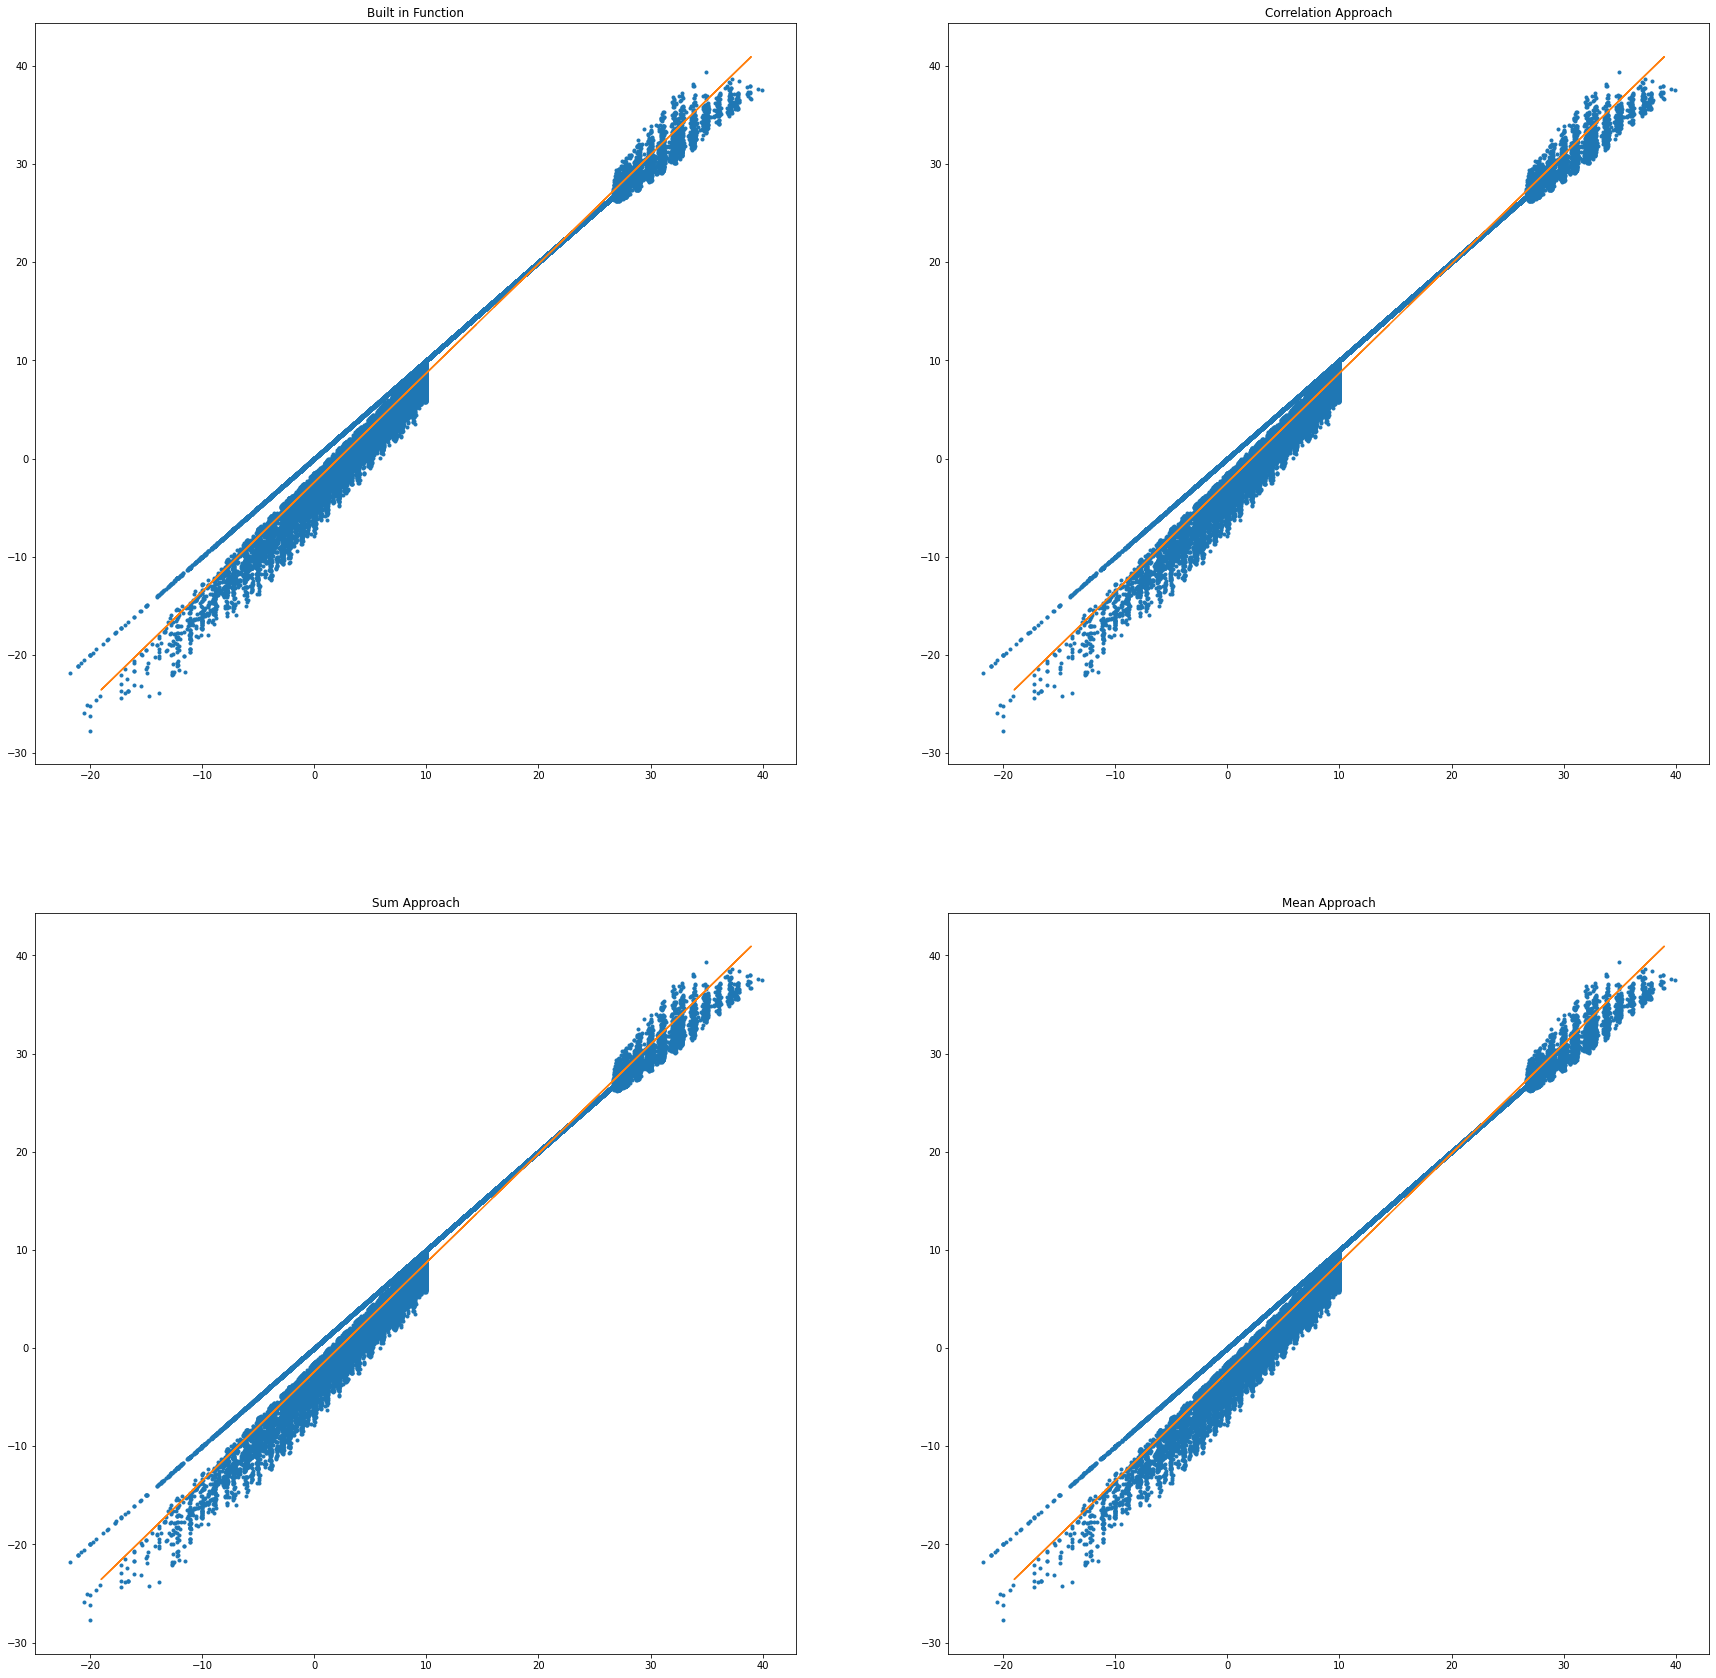

In [29]:
# Figure Define
fig, ax = plt.subplots(2, 2)
fig.set_figheight(30)
fig.set_figwidth(30)

# Built in function
ax[0, 0].plot(feature, label, ".",
         predict_value, prediction_1, "-")
ax[0, 0].title.set_text("Built in Function")

# Correlation Approach
ax[0, 1].plot(feature, label, ".",
         predict_value, prediction_2, "-")
ax[0, 1].title.set_text("Correlation Approach")

# Sum Approach
ax[1, 0].plot(feature, label, ".",
         predict_value, prediction_3, "-")
ax[1, 0].title.set_text("Sum Approach")

# Mean Approach
ax[1, 1].plot(feature, label, ".",
         predict_value, prediction_4, "-")
ax[1, 1].title.set_text("Mean Approach")

# Show figure
plt.show()

### Gradient Descent ( Need Optimized )

#### Function Implementation

##### Helper Function

In [30]:
def modulus(vector):
  return np.sqrt(vector.dot(vector))

In [31]:
def intercept_gradient(error):
  return sum(error)

In [32]:
def slope_gradient(error, feature):
  return np.dot(error, feature)

In [33]:
def residual(prediction, label):
  return prediction - label

In [34]:
def rss(prediction, label):
  return np.dot(residual(prediction, label), residual(prediction, label))

In [35]:
def predict(intercept, slope, input):
  return intercept + slope * input

##### Gradient Descent Function

In [36]:
def simple_linear_gradient_descent(feature, label, initial_intercept, initial_slope, step_size, tolerance):
  converged = False

  intercept = np.array([initial_intercept])
  slope = np.array([initial_slope])

  while not converged:
    prediction = predict(intercept, slope, feature)
    error = residual(prediction, label)

    grad_intercept = intercept_gradient(error)
    grad_slope = slope_gradient(error, feature)

    intercept = intercept - step_size * grad_intercept
    slope = slope - step_size * grad_slope

    rss_gradient = np.array([grad_intercept, grad_slope])

    # print(intercept, slope, rss_gradient, modulus(rss_gradient))

    if (modulus(rss_gradient) < tolerance):
      converged = True

  return intercept, slope

In [37]:
# True
initial_intercept = 0
initial_slope = 0
step_size = 0.05
tolerance = 0.01

input = np.array(range(5))
output = np.array([1, 3, 7, 13, 21])

intercept, slope = simple_linear_gradient_descent(input, output, initial_intercept, initial_slope, step_size, tolerance)

print(intercept, slope)

[-0.99420698] [4.99796792]


In [38]:
# # Built in function
# initial_intercept = 0
# initial_slope = 0
# step_size = 0.05
# tolerance = 0.01

# input = train["Temperature (C)"].values
# output = train["Apparent Temperature (C)"].values

# # Self-define Gradient Descent
# intercept, slope = simple_linear_gradient_descent(input, output, initial_intercept, initial_slope, step_size, tolerance)

# print("- Self Implement:", (intercept, slope))

#### Testing Section

In [39]:
from sklearn.linear_model import SGDRegressor

##### Regression Coefficient

In [40]:
# Built in function
initial_intercept = 0
initial_slope = 0
step_size = 7e-12
tolerance = 2.5e7

input = train["Temperature (C)"].values
output = train["Apparent Temperature (C)"].values

# Self-define Gradient Descent
intercept, slope = simple_linear_gradient_descent(input, output, initial_intercept, initial_slope, step_size, tolerance)

# Built in library
sgd_model = SGDRegressor().fit(np.reshape(input, [-1, 1]), output)

print("- Built in Function:", (sgd_model.intercept_, sgd_model.coef_))
print("- Self Implement:", (intercept, slope))

- Built in Function: (array([-2.42742109]), array([1.08552847]))
- Self Implement: (array([5.87007482e-06]), array([0.00012501]))


##### Prediction first value of test data

In [41]:
predict_value = test["Temperature (C)"].values[0]

prediction = sgd_model.predict(np.reshape(predict_value, [-1, 1]))
self_prediction = predict(intercept, slope, predict_value)

print("- Built in Function:", prediction)
print("- Self Implement:", self_prediction)

- Built in Function: [13.22831177]
- Self Implement: [0.00180875]


##### Compute Loss

In [42]:
# Feature and Label for training purpose
feature = train["Temperature (C)"].values
label = train["Apparent Temperature (C)"].values

# Feature and Label for testing purpose
predict_value = test["Temperature (C)"].values
predict_label = test["Apparent Temperature (C)"].values

# Built in function
prediction_1 = linear_model.predict(np.reshape(predict_value, [-1, 1]))

# Self Implement
prediction_2 = predict(intercept, slope, predict_value)

print("- Built in Function:", sklearn.metrics.mean_squared_error(prediction_1, test["Apparent Temperature (C)"].values))
print("- Self Implement:", sklearn.metrics.mean_squared_error(prediction_2, test["Apparent Temperature (C)"].values))

- Built in Function: 1.6820729326083672
- Self Implement: 230.11346381895984


## Multiple Regression

### Feature Extraction

In [43]:
def matrix_extraction(data, feature_list, label_list):
  data['constant'] = 1

  feature_list = ['constant'] + feature_list

  feature = data[feature_list].values
  label = data[label_list].values

  return feature, label

### Matrix Equation Approach

#### Function Implementation

In [44]:
def fitted_weight(feature, label):
  return np.dot(np.dot(feature.T, label), np.linalg.inv(np.dot(feature.T, feature)))

In [45]:
def predict(feature, weight):
  return feature.dot(weight)

#### Simple Regression Testing Section

##### Regression Coefficient

In [46]:
input = train["Temperature (C)"].values
output = train["Apparent Temperature (C)"].values

# Built in library
sgd_model = SGDRegressor().fit(np.reshape(input, [-1, 1]), output)

(feature, label) = matrix_extraction(train, ["Temperature (C)"], 'Apparent Temperature (C)')

# Expected Output: (-2.4161751423042777, 1.1119702535787954)
weight = fitted_weight(feature, label)

print("- Built in Function:", (sgd_model.intercept_, sgd_model.coef_))
print("- Self Implement:", (weight))

- Built in Function: (array([-2.44323271]), array([1.10491588]))
- Self Implement: [-2.41617514  1.11197025]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Prediction first value of test data

In [47]:
predict_value = test["Temperature (C)"].values[0]

prediction = sgd_model.predict(np.reshape(predict_value, [-1, 1]))
self_prediction = predict(np.array([1, predict_value]), weight)

print("- Built in Function:", prediction)
print("- Self Implement:", self_prediction)

- Built in Function: [13.49210969]
- Self Implement: 13.620906959309911


##### Compute Loss

In [48]:
# Feature and Label for training purpose
(feature, label) = matrix_extraction(train, ["Temperature (C)"], 'Apparent Temperature (C)')

# Feature and Label for testing purpose
(predict_feature, predict_label) = matrix_extraction(test, ["Temperature (C)"], 'Apparent Temperature (C)')

# Built in function
prediction_1 = linear_model.predict(np.reshape(test["Temperature (C)"].values, [-1, 1]))

# Self Implement
weight = np.array(fitted_weight(feature, label))
prediction_2 = predict(predict_feature, weight)

print("- Built in Function:", sklearn.metrics.mean_squared_error(prediction_1, test["Apparent Temperature (C)"].values))
print("- Self Implement:", sklearn.metrics.mean_squared_error(prediction_2, test["Apparent Temperature (C)"].values))

- Built in Function: 1.6820729326083672
- Self Implement: 1.682072932608367


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Visualization

MSE for linear model: 94.61
MSE for gradient descent model: 92.51


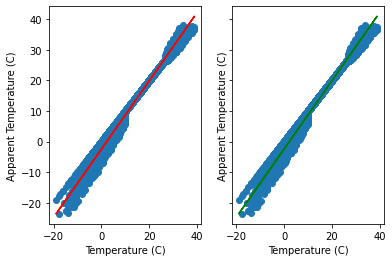

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# scatter on both
datapoint_x = predict_feature[:, 1]
datapoint_y = predict_label
ax1.scatter(datapoint_x, datapoint_y)
ax2.scatter(datapoint_x, datapoint_y)

# draw the linear version on 1 and sgd on 2
# Insert your code here:
ax1.plot(datapoint_x, prediction_1, 'r')

ax2.plot(datapoint_x, prediction_2, 'g')

ax1.set_xlabel("Temperature (C)")
ax2.set_xlabel("Temperature (C)")
ax1.set_ylabel("Apparent Temperature (C)")
ax2.set_ylabel("Apparent Temperature (C)")

error_linear = mean_squared_error(test_labels, linear_y)
error_sgd = mean_squared_error(test_labels, sgd_y)
print("MSE for linear model: {:.2f}\nMSE for gradient descent model: {:.2f}".format(error_linear, error_sgd))

#### Multiple Regression Testing Section

##### Regression Coefficient

In [50]:
input = train[["Temperature (C)", "Humidity"]].values
output = train["Visibility (km)"].values

# Built in library
sgd_model = SGDRegressor().fit(input, output)

(feature, label) = matrix_extraction(train, ["Temperature (C)", "Humidity"], "Visibility (km)")

# Expected Output: (-2.4161751423042777, 1.1119702535787954)
weight = fitted_weight(feature, label)

print("- Built in Function:", (sgd_model.intercept_, sgd_model.coef_))
print("- Self Implement:", (weight))

- Built in Function: (array([12.14933545]), array([ 0.0706899 , -4.29035506]))
- Self Implement: [12.15169908  0.11560436 -4.32402645]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Prediction first value of test data

In [51]:
predict_value = [test[["Temperature (C)", "Humidity"]].values[0]]

prediction = sgd_model.predict(predict_value)

(predict_feature, predict_label) = matrix_extraction(test, ["Temperature (C)", "Humidity"], "Visibility (km)")
self_prediction = predict(predict_feature[0], weight)

print("- Built in Function:", prediction)
print("- Self Implement:", self_prediction)

- Built in Function: [9.17881076]
- Self Implement: 9.797626215833803


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Compute Loss

In [52]:
# Feature and Label for training purpose
(feature, label) = matrix_extraction(train, ["Temperature (C)", "Humidity"], "Visibility (km)")

# Feature and Label for testing purpose
(predict_feature, predict_label) = matrix_extraction(test, ["Temperature (C)", "Humidity"], "Visibility (km)")

# Built in function
prediction_1 = sgd_model.predict(test[["Temperature (C)", "Humidity"]].values)

# Self Implement
weight = np.array(fitted_weight(feature, label))
prediction_2 = predict(predict_feature, weight)

print("- Built in Function:", sklearn.metrics.mean_squared_error(prediction_1, test["Apparent Temperature (C)"].values))
print("- Self Implement:", sklearn.metrics.mean_squared_error(prediction_2, test["Apparent Temperature (C)"].values))

- Built in Function: 91.37017131805098
- Self Implement: 82.73507477692128


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Gradient Descent Approach ( Need Optimized )

#### Matrix Notation

##### Function Implementation

In [53]:
def predict(feature, weight):
  return np.dot(feature, weight)

In [54]:
def rss_gradient(error, feature):
  return np.dot(error, feature)

In [55]:
def matrix_gradient_descent(feature, label, weight, step_size, tolerance):
  converged = False

  while not converged:
    prediction = predict(feature, weight)
    error = residual(prediction, label)

    gradient = rss_gradient(error, feature)

    weight = weight - step_size * gradient

    if(modulus(gradient) < tolerance):
      converged = True
  
  return weight

#### Vector Notation

##### Function Implementation

In [56]:
def vector_gradient_descent(feature, label, weight, step_size, tolerance):
  converged = False

  while not converged:
    prediction = predict(feature, weight)
    error = residual(prediction, label)

    gradient = 0

    for i in range(len(weight)):
      partial = rss_gradient(error, feature[:, i])

      weight[i] = weight[i] - step_size * partial

      gradient = gradient + partial ** 2

    if(np.sqrt(gradient) <= tolerance):
      converged = True
  
  return weight

#### Testing Section

In [57]:
simple_features = ["Temperature (C)"]
my_output = 'Apparent Temperature (C)'
(simple_feature_matrix, output) = matrix_extraction(train, simple_features, my_output)
initial_weights = np.array([0., 0.])
step_size = 7e-12
tolerance = 2.5e7

weight_1 = vector_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
weight_2 = matrix_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

print("- Vector Approach:", weight_1)
print("- Matrix Approach:", weight_2)

- Vector Approach: [5.87007482e-06 1.25007328e-04]
- Matrix Approach: [1.17393398e-05 2.49998813e-04]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MSE for linear model: 230.11
MSE for gradient descent model: 230.06


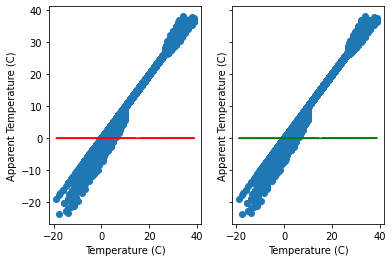

In [58]:
features = ["Temperature (C)"]
output = 'Apparent Temperature (C)'
(predict_feature, predict_label) = matrix_extraction(test, features, output)

prediction_1 = predict(predict_feature, weight_1)
prediction_2 = predict(predict_feature, weight_2)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# scatter on both
datapoint_x = predict_feature[:, 1]
datapoint_y = predict_label
ax1.scatter(datapoint_x, datapoint_y)
ax2.scatter(datapoint_x, datapoint_y)

# draw the linear version on 1 and sgd on 2
# Insert your code here:
ax1.plot(datapoint_x, prediction_1, 'r')

ax2.plot(datapoint_x, prediction_2, 'g')

ax1.set_xlabel("Temperature (C)")
ax2.set_xlabel("Temperature (C)")
ax1.set_ylabel("Apparent Temperature (C)")
ax2.set_ylabel("Apparent Temperature (C)")

error_linear = mean_squared_error(predict_label, prediction_1)
error_sgd = mean_squared_error(predict_label, prediction_2)
print("MSE for linear model: {:.2f}\nMSE for gradient descent model: {:.2f}".format(error_linear, error_sgd))

#### Test on data house.csv

In [59]:
df = pd.read_csv('/content/drive/MyDrive/FUNIX Progress/MLP302x_1.1-A_EN/data/kc_house_data.csv')

model_1 = LinearRegression().fit(np.reshape(df['sqft_living'].values, [-1, 1]), df['price'].values)
print("- Built in function:", model_1.intercept_, model_1.coef_)

simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = matrix_extraction(df, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

updated_weights = matrix_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
updated_weights

print("- Matrix Approach:", updated_weights)

updated_weights = vector_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
updated_weights

print("- Vector Approach:", updated_weights)

- Built in function: -43580.74309447396 [280.6235679]
- Matrix Approach: [-46999.88601366    281.99921915]
- Vector Approach: [-46999.88601366    281.99921915]
